# Hands on timeseries analysis
### part6 : Linear trend and seasonal methods for time series forecasts

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.08.14 </div> 
<div style="text-align: right"> Last update: 2020.08.14</div> 

앞에서 moving average 방법을 사용하여 시계열의 trend와 seasonality를 모델링할 수 없음을 확인하였다. 여기서는 이 두 요소를 모델링하기 위한 방법에 대하여 설명한다. 
- 참고자료  
    - [7 methods to perform Time Series forecasting](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)
    - [Forecasting: Principles and Practice](https://otexts.com/fppkr/holt-winters.html)

### 1. 데이터셋 불러오기

`airline passengers.csv` 데이터셋을 사용한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 500)

from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/airline_passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=['Month'])

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


데이터셋 나누기
- 1960년을 기준으로 학습, 시험 데이터로 구분한다.

In [4]:
train = df[:'1960']
test = df['1960':]

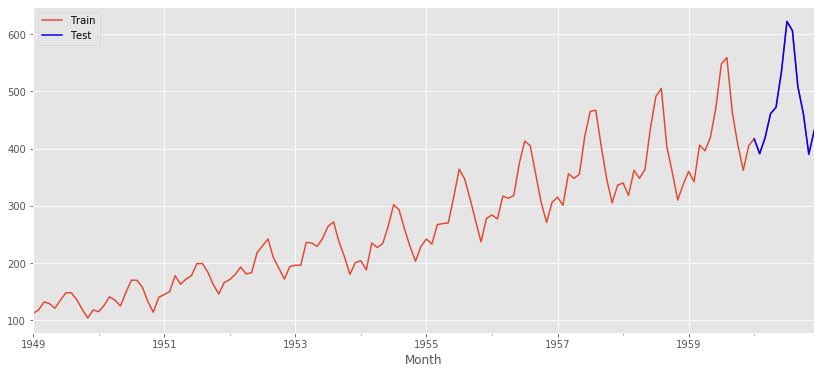

In [5]:
fig, ax = plt.subplots(figsize = (14, 6))
train['Thousands of Passengers'].plot(ax = ax, label = 'Train')
test['Thousands of Passengers'].plot(ax = ax, color = 'b', label = 'Test')
plt.legend()

In [6]:
len(train)

144

In [7]:
len(test)

12

### 2. Holt's linear trend method

Holt's method는 시계열의 trend 성분을 보상하기 위하여 exponenntial smoothing의 개념을 확장한 것이다. 앞에서 exponential smoothing의 계산식은 다음과 같았다.  
$$\hat{y}_{t+1} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t} $$ 

Holt's method는 level 과 trend 성분에 exponential smoothing을 적용한 방법이다.  
- level equation : $$l_t = \alpha \cdot y_t + (1-\alpha) \cdot (l_{t-1}-b_{t-1}) $$  
- trend equation : $$b_t = \beta \cdot (l_{t}-l_{t-1}) + (1-\beta) \cdot b_{t-1} $$  

- Forecast equation : $$\hat{y}_{t+h} = \alpha \cdot l_t + h\cdot b_{t} $$ 

결국 Forecast equation은 level과 trend 식이 덧셈형태로 되어 있다.  
$\alpha$(smoothing_level)와 $\beta$(smoothing_slope)는 임의로 지정해야 한다.

multistep forecasting model 구현하기   
- `statsmodels` 라이브러리를 활용한다.

In [8]:
from statsmodels.tsa.api import Holt

In [9]:
fit1 = Holt(np.asarray(train['Thousands of Passengers'])).fit(smoothing_level = 0.1,
                                                              smoothing_slope = 0.2)

In [10]:
results = fit1.forecast(len(test))

In [11]:
results

array([511.4634568 , 515.75807915, 520.0527015 , 524.34732384,
       528.64194619, 532.93656853, 537.23119088, 541.52581322,
       545.82043557, 550.11505792, 554.40968026, 558.70430261])

In [12]:
test['Forecasts'] = results

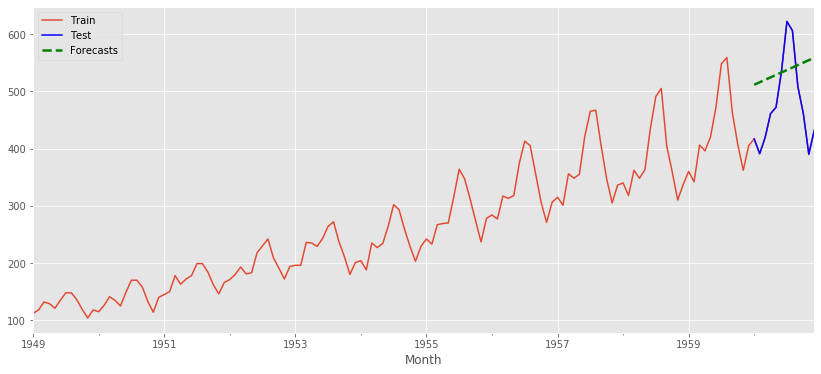

In [13]:
fig, ax = plt.subplots(figsize = (14, 6))
train['Thousands of Passengers'].plot(ax = ax, label = 'Train')
test['Thousands of Passengers'].plot(ax = ax, color = 'b', label = 'Test')
test['Forecasts'].plot(ax = ax, style = 'g--', lw = 2.5, label = 'Forecasts')
plt.legend()

### 3. Holt-Winters method  
Holt's method를 보완하여 trend와 seasonality를 동시에 고려하는 모델을 만든다.

Holt-Winters method는 level, trend, 그리고 seasonal 성분에 exponential smoothing을 적용한 방법이다.  
- level equation : $$l_t = \alpha \cdot (y_t - S_{t-s}) + (1-\alpha) \cdot (l_{t-1}-b_{t-1}) $$  
- trend equation : $$b_t = \beta \cdot (l_{t}-l_{t-1}) + (1-\beta) \cdot b_{t-1} $$ 
- sesonal equation : $$S_t = \gamma \cdot (y_t - l_{t}) + (1-\gamma) \cdot S_{t-s} $$ 

- Forecast equation : $$\hat{F}_{t+k} = L_t + k\cdot b_{t} + S_{t+k-s}$$ 

multistep forecasting model 구현하기   
- `statsmodels` 라이브러리를 활용한다.

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
fit1 = ExponentialSmoothing(np.asarray(train['Thousands of Passengers']), 
                      seasonal = 'mul', seasonal_periods=12, trend='add').fit()

In [16]:
results = fit1.forecast(len(test))

In [17]:
results

array([445.24235627, 418.22529164, 465.30952421, 494.95123768,
       505.47579507, 573.31245956, 663.59620778, 654.90382203,
       546.76092987, 488.4469207 , 415.72356457, 460.37794472])

In [18]:
test['Forecasts'] = results

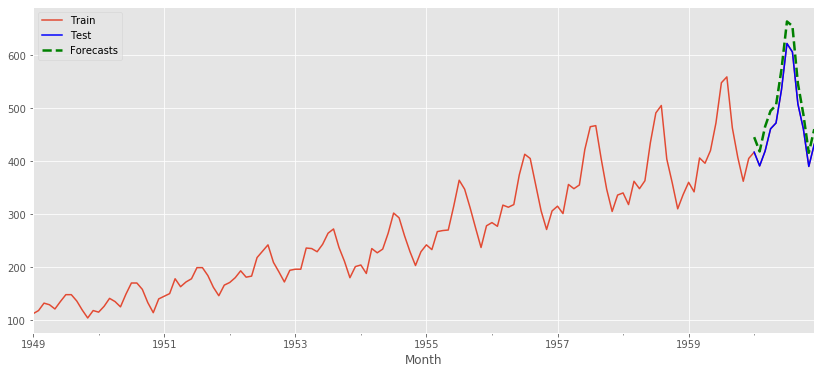

In [19]:
fig, ax = plt.subplots(figsize = (14, 6))
train['Thousands of Passengers'].plot(ax = ax, label = 'Train')
test['Thousands of Passengers'].plot(ax = ax, color = 'b', label = 'Test')
test['Forecasts'].plot(ax = ax, style = 'g--', lw = 2.5, label = 'Forecasts')
plt.legend()